# ЛАБОРАТОРНА РОБОТА 
## Елементи конструювання ознак в МН

## Теоретичне введення

[Конструювання ознак](https://ru.wikipedia.org/wiki/Конструирование_признаков) (_feature engineering_) - це процес створення нових ознак/показчиків або модифікації існуючих для поліпшення продуктивності моделей машинного навчання. 

__Ціль__ цього етапу - визначати основні закономірності в даних, які є актуальними для вирішуваної проблеми, та представити цю інформацію в формах та форматах, які можуть використовувати алгоритми машинного навчання.

## Завдання

В даних ретейл-компанії які знаходяться в файлі `apartments_orig.csv` та відображають в відомості про продажі квартир на вторинному ринку зробити наступне:
1. Провести попередній аналіз структури даних
2. Знайти та видалити дубльовані рядки
3. Провести реконструкцію пропущених даних
4. Розробити та додати нові ознаки
5. Зберегти оброблені дані в файлі `apartments_clean.csv`

Завдання виконувати послідовно додержуючись інструкцій та коментарів

### 1. Підготовка 

In [1]:
# імпортувати необхідні бібліотеки
...
import pandas as pd
import numpy as np

In [2]:
# створити датафрейм з ім'ям 'apartments' з файлу 'apartments.csv'
apartments = pd.read_csv('apartnents-Copy2.csv')

In [3]:
# вивести загальну інформацію про датафрейм (head, info, describe, ...)
apartments.head()

,Price,rooms,price_per_m2,level,levels,year,area_total,area_living,area_kitchen,street,publish_date
0,140000.0,2.0,2258.0,7.0,9.0,1969.0,62.0,47.0,9.0,Омеляновича-Павленка,3 вересня 2020 р.
1,105000.0,4.0,847.0,25.0,26.0,2018.0,124.0,71.0,16.0,NaN,7 жовтня 2020 р.
2,175000.0,3.0,1786.0,25.0,26.0,2010.0,98.0,NaN,NaN,Ованеса Туманяна,1 жовтня 2020 р.
3,30970.0,1.0,1106.0,12.0,13.0,2013.0,28.0,13.0,5.0,Петропавлівська,1 лютого
4,82000.0,2.0,1281.0,18.0,26.0,NaN,64.0,NaN,NaN,Дніпровська,NaN


In [4]:
apartments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 728 entries, 0 to 727
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Price         728 non-null    float64
 1   rooms         724 non-null    float64
 2   price_per_m2  723 non-null    float64
 3   level         703 non-null    float64
 4   levels        703 non-null    float64
 5   year          540 non-null    float64
 6   area_total    640 non-null    float64
 7   area_living   497 non-null    float64
 8   area_kitchen  524 non-null    float64
 9   street        688 non-null    object 
 10  publish_date  550 non-null    object 
dtypes: float64(9), object(2)
memory usage: 62.7+ KB


In [5]:
apartments.describe()

,Price,rooms,price_per_m2,level,levels,year,area_total,area_living,area_kitchen
count,7.280000e+02,724.000000,723.000000,703.000000,703.000000,540.000000,640.000000,497.000000,524.000000
mean,2.001384e+05,2.226519,2090.259059,9.631579,17.695590,1996.662963,79.928125,42.301811,15.881679
std,6.748939e+05,1.027190,5900.910584,6.931243,8.458113,27.125786,51.143278,30.571793,10.043182
min,1.009210e+04,1.000000,478.000000,1.000000,2.000000,1860.000000,15.000000,10.000000,3.000000
25%,6.500000e+04,1.000000,1147.000000,4.000000,9.000000,1977.000000,50.000000,25.000000,10.000000
50%,1.039500e+05,2.000000,1562.000000,8.000000,19.000000,2010.000000,68.500000,37.000000,14.000000
75%,1.700000e+05,3.000000,2188.000000,14.000000,25.000000,2016.000000,92.250000,50.000000,18.000000
max,1.570000e+07,7.000000,157000.000000,33.000000,47.000000,2021.000000,520.000000,320.000000,78.000000


### 2

In [6]:
apartments.drop_duplicates(inplace=True)

In [7]:
apartments.drop(columns=['publish_date'], inplace=True)

### 3

In [8]:
# заповнити незначащі числові показчики медіаной відповідної колонки
apartments.fillna({
    'rooms': apartments['rooms'].median(),
    'price_per_m2':apartments['price_per_m2'].median(),
    'level':apartments['level'].median(),
    'levels':apartments['levels'].median(),
    'year':apartments['year'].median(),
    'apartments':apartments['area_total'].median(),
    'area_living':apartments['area_living'].median(),
    'area_kitchen':apartments['area_kitchen'].median(),    
}, inplace=True)

In [9]:
apartments.fillna(method='bfill', inplace=True)

In [10]:
apartments.columns

Index(['Price', 'rooms', 'price_per_m2', 'level', 'levels', 'year',
       'area_total', 'area_living', 'area_kitchen', 'street'],
      dtype='object')

In [11]:
apartments.head()

,Price,rooms,price_per_m2,level,levels,year,area_total,area_living,area_kitchen,street
0,140000.0,2.0,2258.0,7.0,9.0,1969.0,62.0,47.0,9.0,Омеляновича-Павленка
1,105000.0,4.0,847.0,25.0,26.0,2018.0,124.0,71.0,16.0,Ованеса Туманяна
2,175000.0,3.0,1786.0,25.0,26.0,2010.0,98.0,37.0,14.0,Ованеса Туманяна
3,30970.0,1.0,1106.0,12.0,13.0,2013.0,28.0,13.0,5.0,Петропавлівська
4,82000.0,2.0,1281.0,18.0,26.0,2009.0,64.0,37.0,14.0,Дніпровська


### 4.1

In [13]:
districts = pd.read_csv('./kiev_districts.csv')
districts.head()


,street,type,district
0,9-го Травня,вулиця,Святошинський
1,Абрикосова,вулиця,Оболонський
2,Абрикосова,вулиця,Дарницький
3,Абрикосова,вулиця,Подільський
4,Августина Волошина,вулиця,Солом’янський


In [14]:
def _find_district(street_name: str) -> str:
    """повертає першу знайдену назву району з 'districts` для вулиці або NaN"""
    result = districts.loc[districts['street'] == street_name, 'district'].values
    return result[0] if len(result) >= 1 else np.nan


In [16]:
# створити нову колонку
dis_col = apartments['street'].map(lambda x: _find_district(x))    

In [21]:
apartments['district']  = dis_col

In [22]:
apartments.head()

,Price,rooms,price_per_m2,level,levels,year,area_total,area_living,area_kitchen,street,district
0,140000.0,2.0,2258.0,7.0,9.0,1969.0,62.0,47.0,9.0,Омеляновича-Павленка,NaN
1,105000.0,4.0,847.0,25.0,26.0,2018.0,124.0,71.0,16.0,Ованеса Туманяна,NaN
2,175000.0,3.0,1786.0,25.0,26.0,2010.0,98.0,37.0,14.0,Ованеса Туманяна,NaN
3,30970.0,1.0,1106.0,12.0,13.0,2013.0,28.0,13.0,5.0,Петропавлівська,Оболонський
4,82000.0,2.0,1281.0,18.0,26.0,2009.0,64.0,37.0,14.0,Дніпровська,Оболонський


### 4.2

In [28]:
apartments['area_comfort'] = apartments['area_total'] - apartments['area_living'] - apartments['area_kitchen']
apartments.loc[apartments['area_comfort'] < 0, 'area_comfort'] = 0

In [29]:
apartments.head()

,Price,rooms,price_per_m2,level,levels,year,area_total,area_living,area_kitchen,street,district,area_comfort
0,140000.0,2.0,2258.0,7.0,9.0,1969.0,62.0,47.0,9.0,Омеляновича-Павленка,NaN,6.0
1,105000.0,4.0,847.0,25.0,26.0,2018.0,124.0,71.0,16.0,Ованеса Туманяна,NaN,37.0
2,175000.0,3.0,1786.0,25.0,26.0,2010.0,98.0,37.0,14.0,Ованеса Туманяна,NaN,47.0
3,30970.0,1.0,1106.0,12.0,13.0,2013.0,28.0,13.0,5.0,Петропавлівська,Оболонський,10.0
4,82000.0,2.0,1281.0,18.0,26.0,2009.0,64.0,37.0,14.0,Дніпровська,Оболонський,13.0


In [30]:
apartments.fillna(method='bfill', inplace=True)

In [32]:
apartments.tail()

,Price,rooms,price_per_m2,level,levels,year,area_total,area_living,area_kitchen,street,district,area_comfort
722,185000.0,2.0,2256.0,6.0,9.0,2009.0,82.0,35.0,24.0,Наумова,Шевченківський,23.0
723,49990.0,3.0,757.0,8.0,9.0,1976.0,66.0,45.0,8.0,Наумова,Шевченківський,13.0
724,89000.0,1.0,2342.0,7.0,15.0,2009.0,38.0,20.0,7.0,Перемоги,Шевченківський,11.0
725,170000.0,2.0,2656.0,5.0,7.0,1948.0,64.0,37.0,9.0,Велика Васильківська,"Голосіївський, Шевченківський, Печерський",18.0
727,46500.0,2.0,1011.0,5.0,5.0,1963.0,46.0,31.0,7.0,Вишгородська,"Подільський, Оболонський",8.0


In [33]:
apartments.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 676 entries, 0 to 727
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Price         676 non-null    float64
 1   rooms         676 non-null    float64
 2   price_per_m2  676 non-null    float64
 3   level         676 non-null    float64
 4   levels        676 non-null    float64
 5   year          676 non-null    float64
 6   area_total    676 non-null    float64
 7   area_living   676 non-null    float64
 8   area_kitchen  676 non-null    float64
 9   street        676 non-null    object 
 10  district      676 non-null    object 
 11  area_comfort  676 non-null    float64
dtypes: float64(10), object(2)
memory usage: 68.7+ KB


In [36]:
old_col = list(apartments.columns)
old_col

['Price',
 'rooms',
 'price_per_m2',
 'level',
 'levels',
 'year',
 'area_total',
 'area_living',
 'area_kitchen',
 'street',
 'district',
 'area_comfort']

In [50]:
new_col = old_col[:9] + [old_col[-1]] + old_col[9:-1]
new_col

['Price',
 'rooms',
 'price_per_m2',
 'level',
 'levels',
 'year',
 'area_total',
 'area_living',
 'area_kitchen',
 'area_comfort',
 'street',
 'district']

In [51]:
apartments = apartments[new_col]
apartments.head()

,Price,rooms,price_per_m2,level,levels,year,area_total,area_living,area_kitchen,area_comfort,street,district
0,140000.0,2.0,2258.0,7.0,9.0,1969.0,62.0,47.0,9.0,6.0,Омеляновича-Павленка,Оболонський
1,105000.0,4.0,847.0,25.0,26.0,2018.0,124.0,71.0,16.0,37.0,Ованеса Туманяна,Оболонський
2,175000.0,3.0,1786.0,25.0,26.0,2010.0,98.0,37.0,14.0,47.0,Ованеса Туманяна,Оболонський
3,30970.0,1.0,1106.0,12.0,13.0,2013.0,28.0,13.0,5.0,10.0,Петропавлівська,Оболонський
4,82000.0,2.0,1281.0,18.0,26.0,2009.0,64.0,37.0,14.0,13.0,Дніпровська,Оболонський


In [52]:
apartments.to_csv('./apartments_final.csv', index=False)

### 5

In [48]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame
# Select features and target
features = list(apartments.columns[1:-3])
target = ['Price']

In [49]:
features + target

['rooms',
 'price_per_m2',
 'level',
 'levels',
 'year',
 'area_total',
 'area_living',
 'area_kitchen',
 'area_comfort',
 'Price']

In [50]:
correlation_matrix = apartments[features + target].corr()

In [51]:
correlation_matrix.shape

(10, 10)

In [52]:
# Extract the target correlation values
target_correlation = correlation_matrix[target].loc[features]

In [73]:
target_correlation.shape

(9, 1)

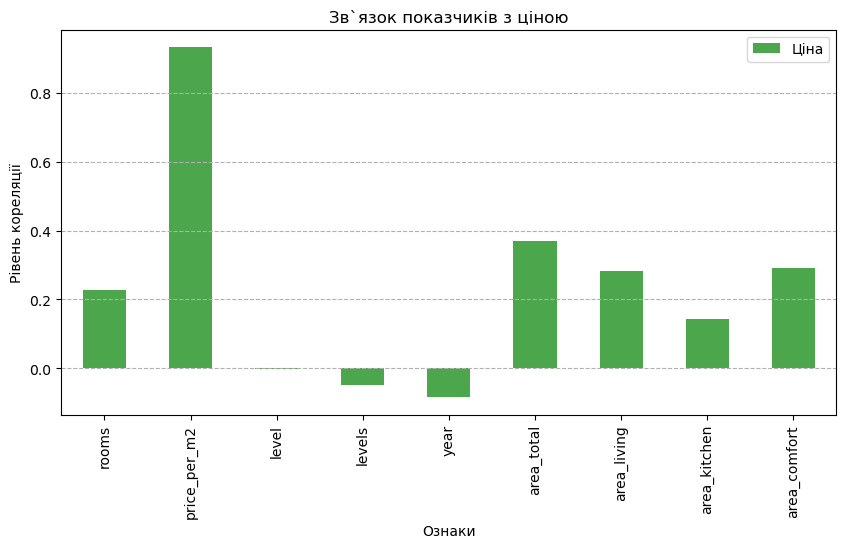

In [91]:
# Plot the correlation values
target_correlation.plot(kind='bar', figsize=(10,5), color='g', alpha=.7)

# Add labels
plt.xlabel("Ознаки")
plt.ylabel("Рівень кореляції")
plt.legend(['Ціна'])
plt.title('Зв`язок показчиків з ціною')
plt.grid(True, axis='y', linestyle='dashed')

# Show the plot
plt.show()

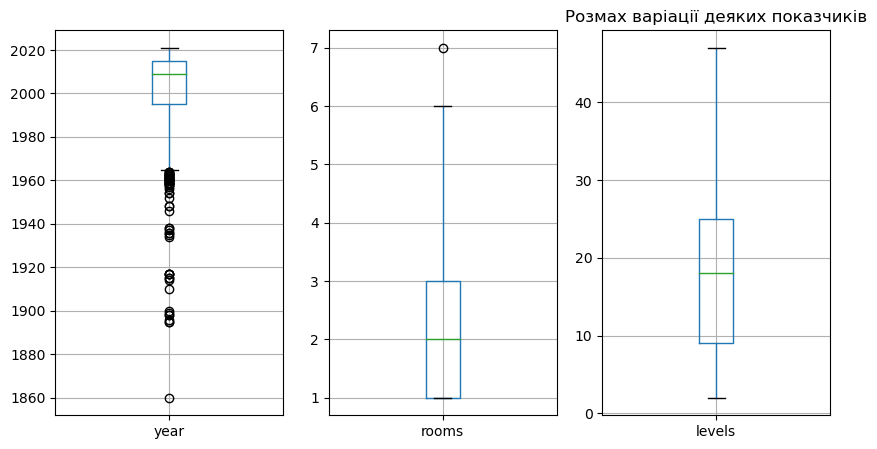

In [121]:
import matplotlib.pyplot as plt

# Create a figure and set its size
fig = plt.figure(figsize=(10, 5))

# Create a subplot for each feature
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)
ax3 = fig.add_subplot?

# Plot the box plot for each feature
apartments.boxplot(column='year', ax=ax1)
apartments.boxplot(column='rooms', ax=ax2)
apartments.boxplot(column='levels', ax=ax3)

# Add a title for each subplot
# ax1.set_title("Рік")
# ax2.set_title("Кількість кімнат")
# ax3.set_title("Кількість поверхів")

plt.title('Розмах варіації деяких показчиків')

# Display the figure
plt.show()


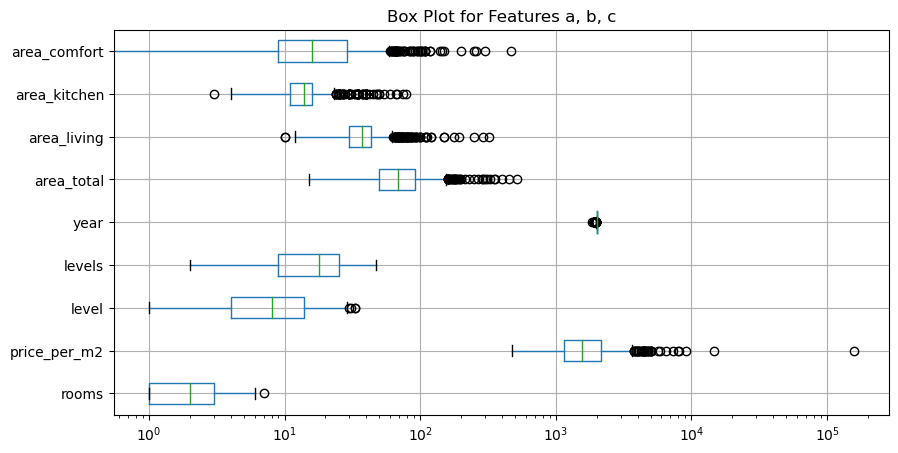

In [95]:
import matplotlib.pyplot as plt

# Create a figure and set its size
fig = plt.figure(figsize=(10, 5))

# Create a single subplot
ax = fig.add_subplot(1, 1, 1)

# Set the x-axis to be logarithmic
ax.set_xscale('log')

# Plot the box plot for each feature
apartments.boxplot(column=features, ax=ax, vert=False)

# Add a title for the subplot
ax.set_title("Box Plot for Features a, b, c")

# Display the figure
plt.show()


### Categories

In [28]:
import pandas as pd
data = pd.read_csv('apartments_category.csv')

In [29]:
data.head()

,Price,rooms,price_per_m2,level,levels,year,area_total,area_living,area_kitchen,area_comfort,street,district,category
0,140000.0,2.0,2258.0,7.0,9.0,1969.0,62.0,47.0,9.0,6.0,Омеляновича-Павленка,Оболонський,економ
1,105000.0,4.0,847.0,25.0,26.0,2018.0,124.0,71.0,16.0,37.0,Ованеса Туманяна,Оболонський,бізнес
2,175000.0,3.0,1786.0,25.0,26.0,2010.0,98.0,37.0,14.0,47.0,Ованеса Туманяна,Оболонський,бізнес
3,30970.0,1.0,1106.0,12.0,13.0,2013.0,28.0,13.0,5.0,10.0,Петропавлівська,Оболонський,економ
4,82000.0,2.0,1281.0,18.0,26.0,2009.0,64.0,37.0,14.0,13.0,Дніпровська,Оболонський,бізнес


In [30]:
data['category'].value_counts()

бізнес    569
економ    104
еліт        3
Name: category, dtype: int64

In [26]:
data[data['category'] == np.nan]

,Price,rooms,price_per_m2,level,levels,year,area_total,area_living,area_kitchen,area_comfort,street,district,category


In [27]:
data.shape

(676, 13)

### Styling

In [31]:
import matplotlib.pyplot as plt

In [34]:
dir(plt.style)

['__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'available',
 'context',
 'core',
 'library',
 'reload_library',
 'use']

In [37]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


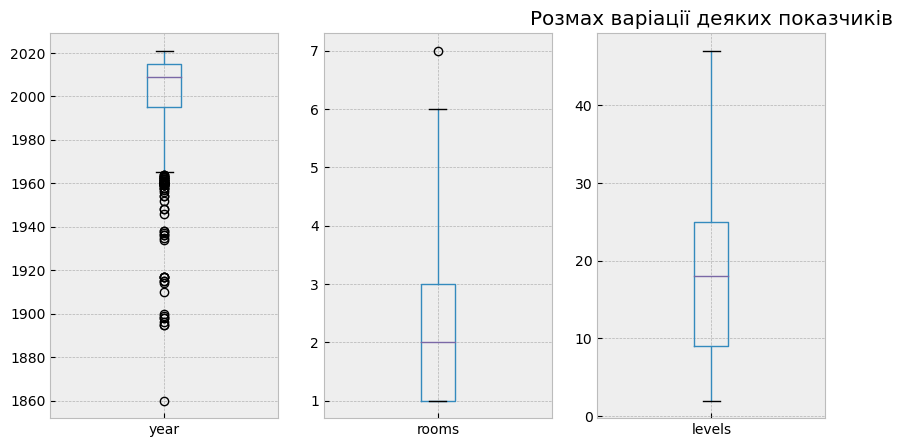

In [66]:
with plt.style.context('bmh'):
    # Create a figure and set its size
    fig = plt.figure(figsize=(10, 5))

    # Create a subplot for each feature
    ax1 = fig.add_subplot(1, 3, 1)
    ax2 = fig.add_subplot(1, 3, 2)
    ax3 = fig.add_subplot(1, 3, 3)
    ax3 = fig.add_subplot?

    # Plot the box plot for each feature
    apartments.boxplot(column='year', ax=ax1)
    apartments.boxplot(column='rooms', ax=ax2)
    apartments.boxplot(column='levels', ax=ax3)

    # Add a title for each subplot
    # ax1.set_title("Рік")
    # ax2.set_title("Кількість кімнат")
    # ax3.set_title("Кількість поверхів")

    plt.title('Розмах варіації деяких показчиків')

    # Display the figure
    plt.show()
